In [20]:
import anndata as ad
import squidpy as sq
import cellcharter as cc #ML
import pandas as pd
import scanpy as sc
import liana as li
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os
from pypath import omnipath
import decoupler as dc

from pytorch_lightning import seed_everything
seed_everything(1337)

Seed set to 1337


1337

In [8]:
# Info
whatFer = "one" # "one" or  "two"

#Load data
base_folder = Path(f"/mnt/c/Users/jonan/Documents/1Work/RoseLab/Spatial/CAR_T/CellCharterAnalysis/{whatFer}fer/")
adata_file = base_folder / f"{whatFer}fer.h5ad"
out_figs = base_folder / "figures" / "CCC"
os.makedirs(out_figs, exist_ok=True)

ST_sample = sc.read_h5ad(adata_file)


In [16]:
matrix = ST_sample.layers['counts']
subset = matrix[:20, :20].todense()
print(subset)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
ST_sample.raw = ST_sample

In [12]:
ST_sample.layers['counts']

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 45122552 stored elements and shape (169773, 16794)>

In [17]:
li.mt.bivariate.show_functions()

,name,metadata,reference
0,pearson,weighted Pearson correlation coefficient,None
1,spearman,weighted Spearman correlation coefficient,None
2,cosine,weighted Cosine similarity,None
3,jaccard,weighted Jaccard similarity,None
4,product,simple weighted product,If vars are z-scaled = Lee's static (Lee 2021;...
5,norm_product,normalized weighted product,None
6,morans,Moran's R,"Li, Z., Wang, T., Liu, P. and Huang, Y., 2022...."
7,masked_spearman,masked & weighted Spearman correlation,"Ghazanfar, S., Lin, Y., Su, X., Lin, D.M., Pat..."


In [23]:
# help(li.ut.spatial_neighbors)

In [22]:
# help(sq.gr.spatial_neighbors)

In [26]:
# help(li.ut.query_bandwidth)

# Identifying badwidth

In [34]:
adata = ST_sample[ST_sample.obs['mouse']=="RTCyPSCA_1_4"].copy()

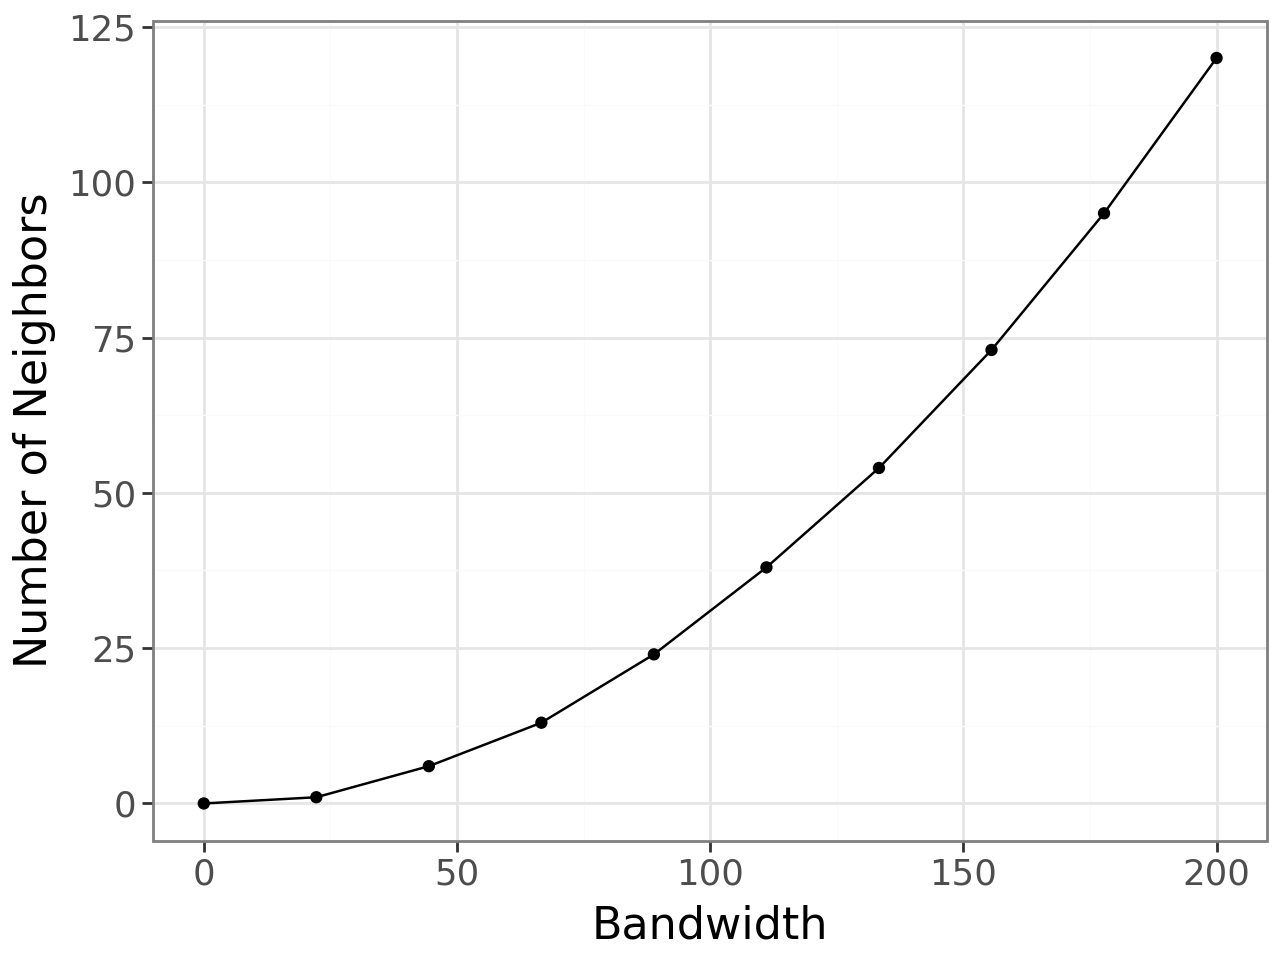

In [38]:
plot, _ = li.ut.query_bandwidth(
            coordinates=adata.obsm['spatial'],
            start=0,
            end=200,
            interval_n=10
)

plot

In [ ]:
li.ut.spatial_neighbors()

In [40]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

coords = adata.obsm['spatial']  # (n_cells × 2) array of centroids
k = 8

nbrs = NearestNeighbors(n_neighbors=k+1,  # +1 because the closest neighbor is itself at distance 0
                        algorithm='auto').fit(coords)
dists, _ = nbrs.kneighbors(coords)

# dists[:, 0] == 0 (self), so pick the k+1’th column for the k-th real neighbor:
sixth = dists[:, k]  

ℓ_median = float(np.median(sixth))
print("Median distance to 6th neighbor → ℓ ≈", ℓ_median)


Median distance to 6th neighbor → ℓ ≈ 50.25858982464141


# Spatial Neighbors

In [45]:
help(li.ut.spatial_neighbors)

Help on function spatial_neighbors in module liana.utils.spatial_neighbors:

spatial_neighbors(adata: anndata._core.anndata.AnnData, bandwidth=None, cutoff=0.1, max_neighbours=100, kernel='gaussian', set_diag=False, zoi=0, standardize=False, reference=None, spatial_key='spatial', key_added='spatial', inplace=True)
    Generate spatial connectivity weights using Euclidean distance.
    
    Parameters
    ----------
    
    adata
        Annotated data object.
    bandwidth
         Denotes signaling length (`l`) and controls the maximum distance at which two spots are considered.
         Corresponds to the units in which spatial coordinates are expressed.
    cutoff
        Values below this cutoff will be set to 0.
    max_neighbours
        Maximum nearest neighbours to be considered when generating spatial connectivity weights.
        Essentially, the maximum number of edges in the spatial connectivity graph.
    kernel
        Kernel function used to generate connectivity weight

In [49]:
li.ut.spatial_neighbors(adata, bandwidth=50, cutoff = 0.1, kernel='gaussian', set_diag=True)

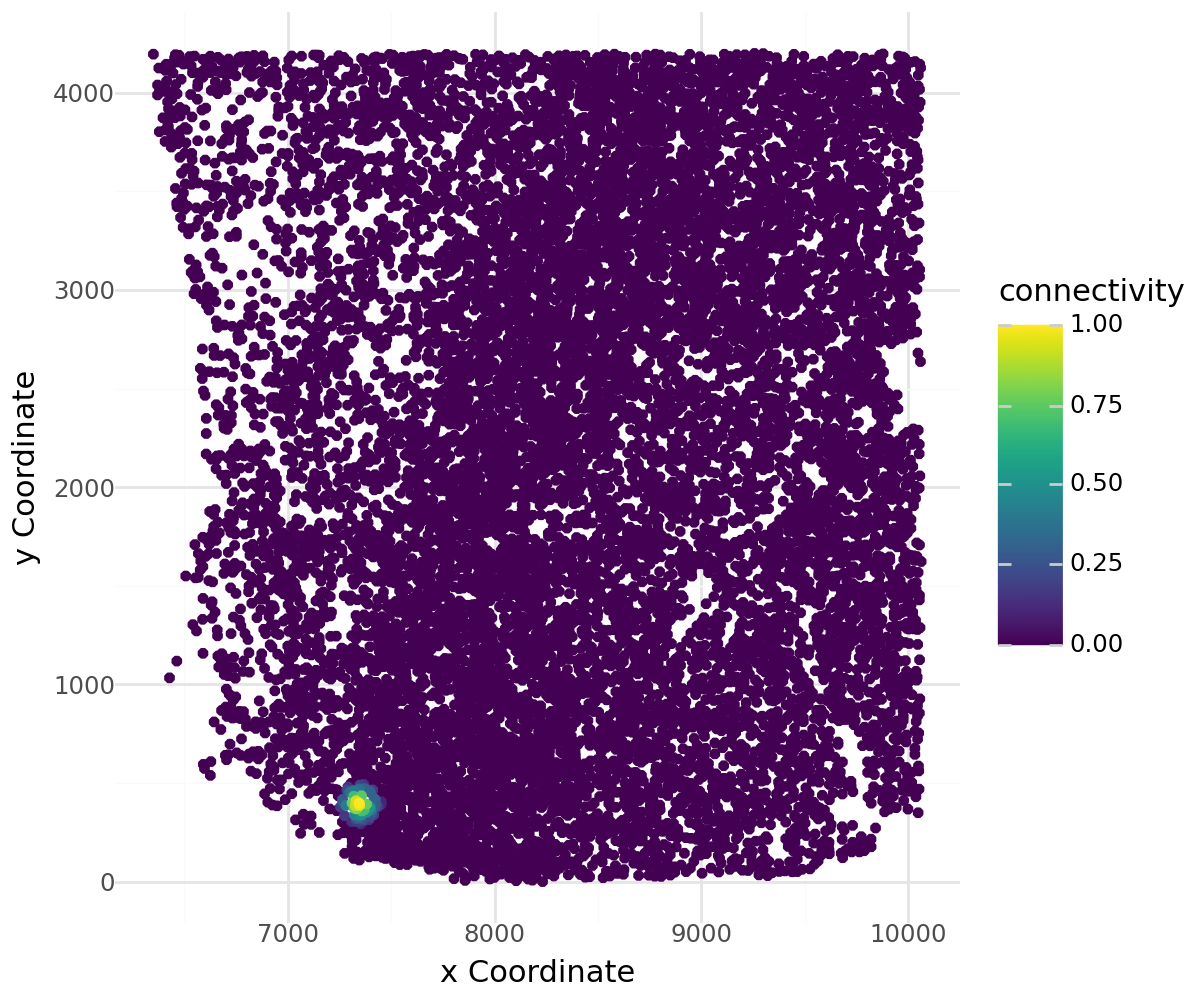

In [59]:
li.pl.connectivity(adata, idx=10000, size=1.3, figure_size=(6, 5))

In [51]:
help(li.pl.connectivity)

Help on function connectivity in module liana.plotting._connectivity_plot:

connectivity(adata: anndata._core.anndata.AnnData, idx: int, spatial_key='spatial', connectivity_key='spatial_connectivities', size=1, figure_size=(5.4, 5), return_fig: bool = True)
    Plot spatial connectivity weights.
    
    Parameters
    ----------
    adata
        Annotated data object.
    spatial_key
        Key in `adata.obsm` that contains the spatial coordinates. Default is `'spatial'`.
    connectivity_key
        Key in `adata.obsp` that contains the spatial connectivity matrix. Default is `'spatial_connectivity'`. 
    size
        Size of the points
    figure_size
        Figure x,y size
    
    return_fig
        `bool` whether to return the fig object.
    
    
    Returns
    -------
    A `plotnine.ggplot` instance



# Identifying receptors

In [62]:
lrdata = li.mt.bivariate(adata,
                resource_name='mouseconsensus', # NOTE: uses HUMAN gene symbols!
                local_name='cosine', # Name of the function
                global_name="morans", # Name global function
                n_perms=100, # Number of permutations to calculate a p-value
                mask_negatives=False, # Whether to mask LowLow/NegativeNegative interactions
                add_categories=True, # Whether to add local categories to the results
                nz_prop=0.05, # Minimum expr. proportion for ligands/receptors and their subunits
                use_raw=False,
                verbose=True
                )

Using `.X`!
/home/jon/anaconda3/envs/spatial_analysis_env/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
2308 features of mat are empty, they will be removed.
Using resource `mouseconsensus`.
100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.22it/s]


In [64]:
lrdata.var.sort_values("mean", ascending=False).head(5)

,ligand,receptor,ligand_means,ligand_props,receptor_means,receptor_props,morans,morans_pvals,mean,std
interaction,,,,,,,,,,
Apoe^Lrp1,Apoe,Lrp1,4.828095,0.521355,1.620548,0.191758,-0.018985,0.0,0.317031,0.158371
App^Cd74,App,Cd74,1.436991,0.167364,4.122237,0.451962,0.016100,0.0,0.292163,0.171956
Vim^Cd44,Vim,Cd44,5.115257,0.556643,0.905706,0.112971,0.114851,0.0,0.248460,0.213172
Spp1^Cd44,Spp1,Cd44,3.952241,0.431989,0.905706,0.112971,0.145379,0.0,0.245746,0.221400
Fn1^Nt5e,Fn1,Nt5e,2.782961,0.316965,0.866829,0.108471,0.117139,0.0,0.230956,0.243004


/tmp/ipykernel_7217/770066996.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.


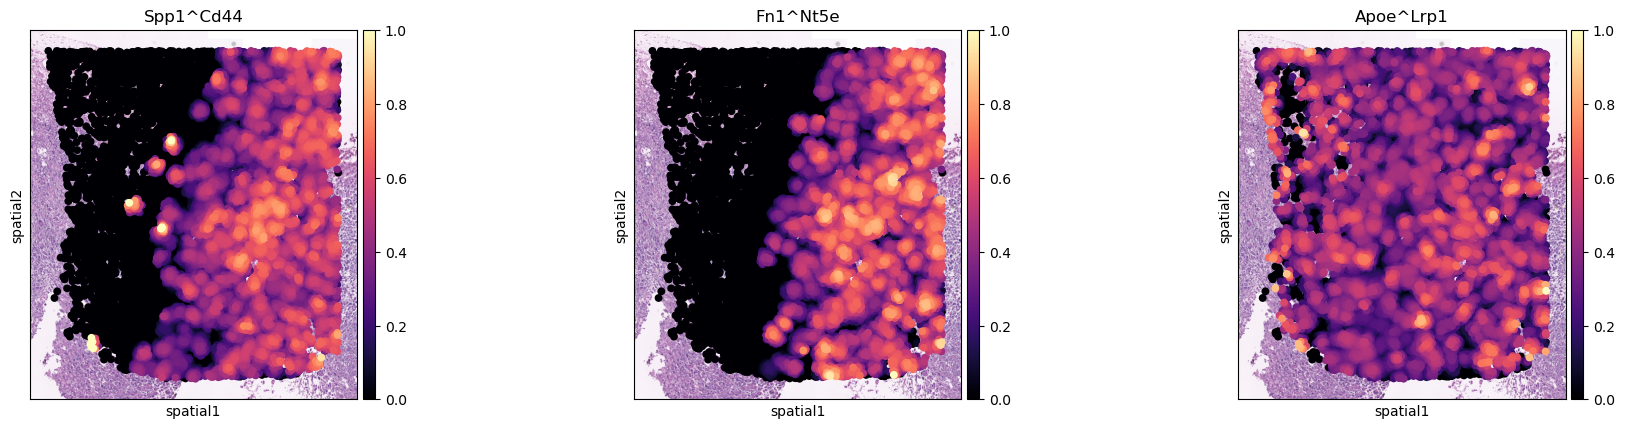

In [69]:
sc.pl.spatial(lrdata, color=["Spp1^Cd44", "Fn1^Nt5e", "Apoe^Lrp1"], size=1, cmap="magma",
             library_id="F07840")

In [74]:
help(sc.pl.spatial)

Help on function spatial in module scanpy.plotting._tools.scatterplots:

spatial(adata: anndata._core.anndata.AnnData, *, color: str | collections.abc.Sequence[str] | None = None, mask_obs: numpy.ndarray[typing.Any, numpy.dtype[numpy.bool_]] | str | None = None, gene_symbols: str | None = None, use_raw: bool | None = None, sort_order: bool = True, edges: bool = False, edges_width: float = 0.1, edges_color: str | collections.abc.Sequence[float] | collections.abc.Sequence[str] = 'grey', neighbors_key: str | None = None, arrows: bool = False, arrows_kwds: collections.abc.Mapping[str, typing.Any] | None = None, groups: str | collections.abc.Sequence[str] | None = None, components: str | collections.abc.Sequence[str] | None = None, dimensions: tuple[int, int] | collections.abc.Sequence[tuple[int, int]] | None = None, layer: str | None = None, projection: Literal['2d', '3d'] = '2d', scale_factor: float | None = None, color_map: matplotlib.colors.Colormap | str | None = None, cmap: matplotlib

In [76]:
sc.set_figure_params(dpi=80, dpi_save=300, format='png', frameon=False, transparent=True, figsize=[5,5])

/tmp/ipykernel_7217/2911547499.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.


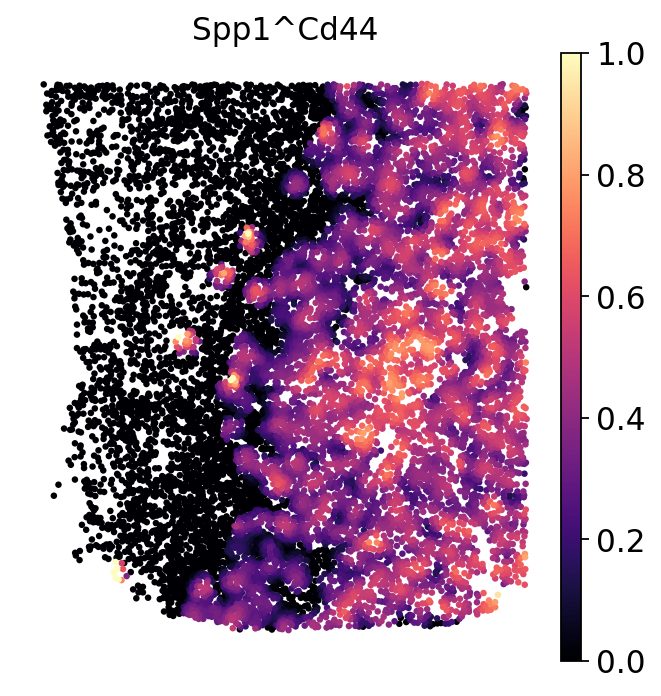

In [79]:
sc.pl.spatial(
    lrdata,
    color=["Spp1^Cd44"],
    size=0.5,
    cmap="magma",
    library_id="F07840",
    img_key=None
)

/tmp/ipykernel_7217/73516206.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.


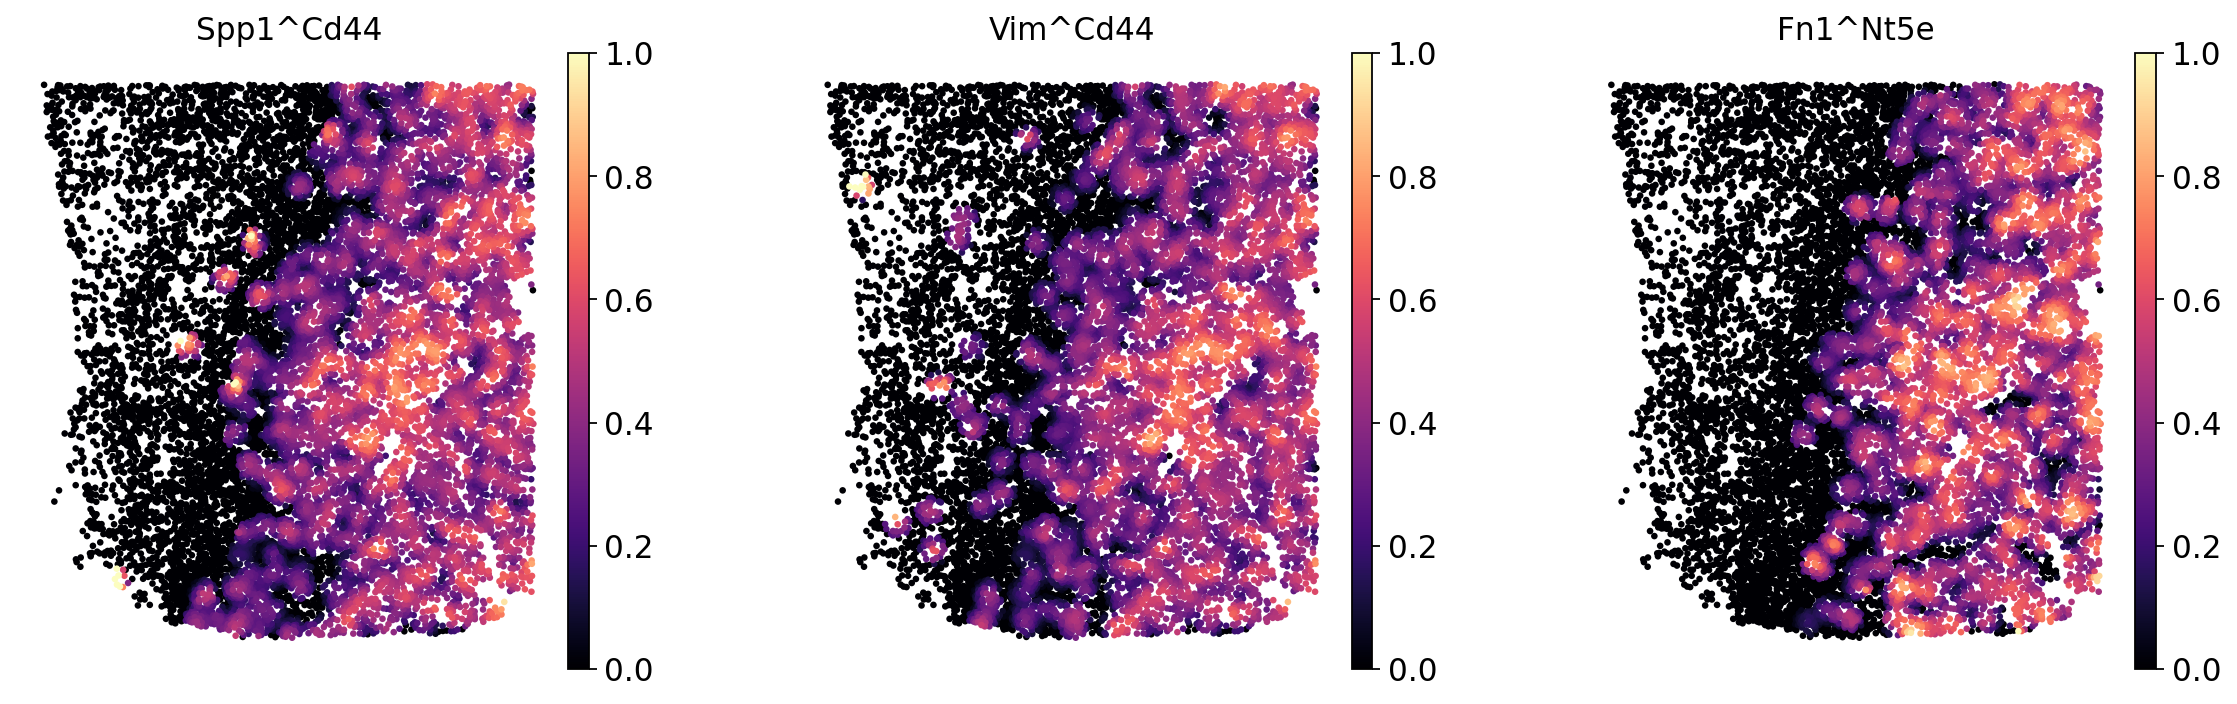

In [83]:
sc.pl.spatial(lrdata, 
              color=["Spp1^Cd44", "Vim^Cd44", "Fn1^Nt5e"], #"Apoe^Lrp1",
              size=0.5, 
              cmap="magma",
             library_id="F07840",
             img_key=None)